In [1]:
# OpenCV is an open source computer vision and machine learning software library
# It provides algorithms to detect and recognize faces, identify objects, 
# track camera movements, etc
import cv2

# To make predictions, ML model needs to be trained by feeding it known face images first.
# OpenCV algorithm uses the pixels of the face images to learn how to predict faces 
# (Highly mathematical deep learning algorithms are used)
# After the training the model it was saved as a file to make new predictions
face_detect = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')  # object

# Import our image as cv2 image
img = cv2.imread('community.jpg')

# two dimendional array of pixels (each pixel is a list of RGB values)
#img

# call cv2.cvtColor() method to convert image to grayscale
# grayscale image is used to do the face prediction
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [2]:

# Call detectMultiScale() object to do face detection
# returns a list of where each face occurs in the two dimensional image
# scaleFactor = 1.3, minNeighbors = 5  (variables for detection sensitivity)
faces = face_detect.detectMultiScale(gray, 1.3, 5)

# x,y is the coordinate of where the face starts
# w,h are the width and height of the detected face

for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

cv2.imwrite('out.jpg', img)


True

![out.jpg](out.jpg)

In [3]:
eye_detect = cv2.CascadeClassifier('haarcascade_eye.xml')

# We can pass each face to do eye detection
for (x,y,w,h) in faces:
    face_gray = gray[y:y+h, x:x+w]   # grayscale face
    face_color = img[y:y+h, x:x+w]   # colored face

    eyes = eye_detect.detectMultiScale(face_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(face_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2.imwrite('out2.jpg', img)

True

![out2](out2.jpg)

In [4]:
import pandas as pd

df = pd.read_csv('heart.csv')
df

# Data from 303 patients

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
# Start exploring the data using the pandas dataframe methods

df.target.value_counts()

# target=1 has heart disease
# 165 patients diagnosed as heart disease

1    165
0    138
Name: target, dtype: int64

In [6]:
df.sex.value_counts()

# sex=1 is male

1    207
0     96
Name: sex, dtype: int64

In [7]:
# getting familiarized with the data

df.describe()

# statistics for each column
# mean, standard deviation, min, max, etc.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
pd.crosstab(df.target, df.sex)

# Out of the people having heart disease, 72 are female, 93 are male

sex,0,1
target,,
0,24,114
1,72,93


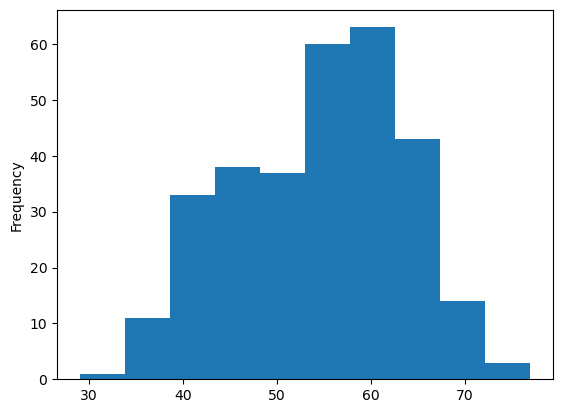

In [9]:
# Continue exploring the data using pandas tools

df.age.plot.hist();

# Histogram of the age of the patients
# Most patients are around 60 years old

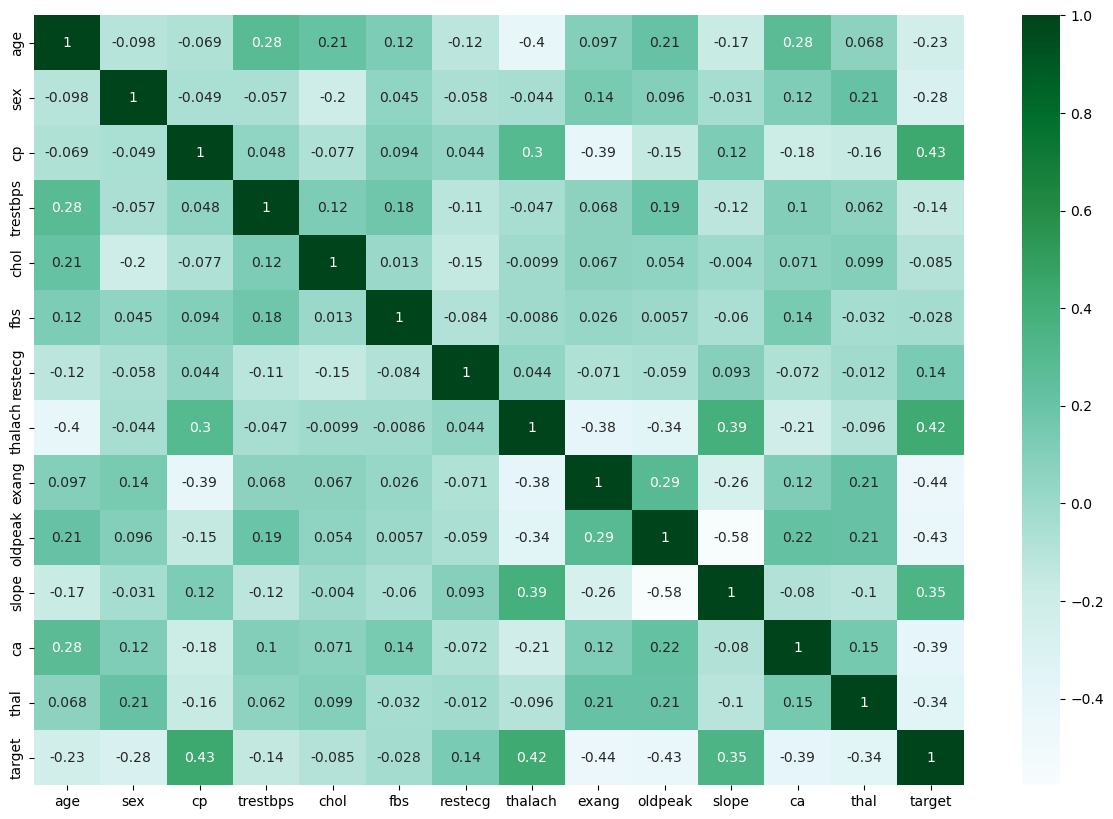

In [10]:
# Correlation matrix of the data
#df.corr()

import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix in heatmap format
plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='BuGn');

# Correlation of parameters between each other
# Positive correlation: as one parameter increases, the other increases as well
# Negative correlation: as one parameter increases, the other decreases
# No correlation: Correlation close to 0. No predictive power

In [11]:
# Remove target column from the data

X = df.drop('target', axis=1)  # data

y = df.target   # target vector to be predicted

X

# X is two dimensional dataframe
# y is one dimensional vector (whether the patient has heart disease)
# Predict y from X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [12]:
# Split to data - 80% to train the model, 20% to test the model

# Use Scikit learn train_test_split() method
from sklearn.model_selection import train_test_split
import numpy as np

# Randomly split
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# X_train, y_train: 80% of the patients randomly chosen. Use this to learn from data
# X_test, y_test: 20% of the patients randomly chosen. Use this to test how well you learn

In [13]:
# 80% of the data will be used to train the model (learn)
X_train

# 242 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [14]:
# 20% of the data will be used to test the model (measure the quality of the learning)
X_test

# 61 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [15]:
# Train using KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

#  try with different number of neighbors to optimize (Can create a for loop)
model.set_params(n_neighbors=11)
model.fit(X_train, y_train)

# Evaluate accuracy using test data
model.score(X_test, y_test)

# 75% accuracy with KNeighborsClassifier model

0.7540983606557377

In [16]:
# Predictions of KNeighborsClassifier
y_preds = model.predict(X_test)

y_preds

# 61 patients in the X_test data, these are the predictions for each patient
# 75% accuracy

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [17]:
# Compare predictions of the model to the actual heart disease in test data
# Confusion matrix 
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_preds))

# 9 False positive
# 6 False negative
# Rest are correct predictions (True positive, true negative)

[[20  9]
 [ 6 26]]


In [18]:
# Let's try another ML model to see if we can do better

# Train using RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate accuracy using test data
model.score(X_test, y_test)

# 84% accuracy

0.8524590163934426

In [19]:
# Predictions of RandomForestClassifier model
y_preds = model.predict(X_test)

# Compare predictions of the model to the actual heart disease in test data
# Confusion matrix 
print(confusion_matrix(y_test, y_preds))

# 5 False positive
# 5 False negative

[[24  5]
 [ 4 28]]


In [20]:
# Feature importances for the RandomForestClassifier
# How much weight was given to input parameters to make the predictions?

model.feature_importances_

array([0.09298141, 0.03957187, 0.1069621 , 0.07721992, 0.07837625,
       0.00995991, 0.0177897 , 0.10928765, 0.0583418 , 0.12878321,
       0.05706672, 0.12645168, 0.09720781])

In [21]:
feature_dict = dict(zip(df.columns, model.feature_importances_))

feature_dict

# RandomForestClassifier gives the most weight to
# 13% oldpeak: ST depression induced by exercise relative to rest
# 12% ca: number of major vessels (0-3) colored by flourosopy
# 12% thalach:  maximum heart rate achieved
# 10% cp: chest pain type

# Different models give different weights to each parameter

# Compare feature_dict to the correlation matrix
# Highly correlated parameters given more weight in prediction

{'age': 0.09298140933191897,
 'sex': 0.03957187222944279,
 'cp': 0.10696209672603961,
 'trestbps': 0.07721991531276631,
 'chol': 0.07837625034216454,
 'fbs': 0.009959906899620124,
 'restecg': 0.017789700953736172,
 'thalach': 0.10928764716436426,
 'exang': 0.05834179545598224,
 'oldpeak': 0.1287832061307213,
 'slope': 0.05706671550490279,
 'ca': 0.12645167752499653,
 'thal': 0.09720780642334445}